## **Project Name - Google Playstore App review Analysis**

**Project Type** - EDA

**Contribution** - Team

**Team member1** - Sanskar Dubey

**Team member2** - Shiv Singh

**Team member3** - Dev Bhandari

**Team member4** - Namrata Nagargoje




# **Project Summary -:**

### The play store review data has enormous potential to drive an app making businesses to success.Data with each columns category, rating, size , installs and many more has values in app (row).Exploring and analyzing the data to discover key factors responsible for app engagement and success. Data actionable insights drawn for android market and for developers to work on.

### The objective of this experiment is to deliver insights to understand customer demands better and thus help developers to popularize the product. We have tried to discover the relationships among various attributes such as which application is free or paid, what are the user reviews, rating of the application.

# **Github Link-:**

https://github.com/Sans-dubey/Google-PlayStore-App-Review-Analysis.git

# **Problem Statement-:**

### Android is expanding as an operating system. It has captured around 74% of the total market which is a true indicator of the huge amount of population using android. Our goal is to help android developers to know what is the motivating factor for people to download an app. It will also help to find out the factors that affect someone’s decision to download an app. I would like to analyse category, reviews, price, ratings and installs for this purpose and find out how they are inter related.

# Know your data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

## Input Files:
### **Play Store Data.csv** - It contains the basic details of the app like number of user reviews, ratings, etc.
### **User Reviews.csv** - It contains the user reviews and its sentiment score for the respective app.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv')

### Dataset First View

In [4]:
df.head() # Checking the first first five rows of our dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Dataset Rows and Column count

In [6]:
df.shape

(10841, 13)

### There are total 13 columns in the Dataset and 10841 records are present in it

## ***Data Wranglling***

## Creting box plot and checking the Outliers in the dataset

<Axes: >

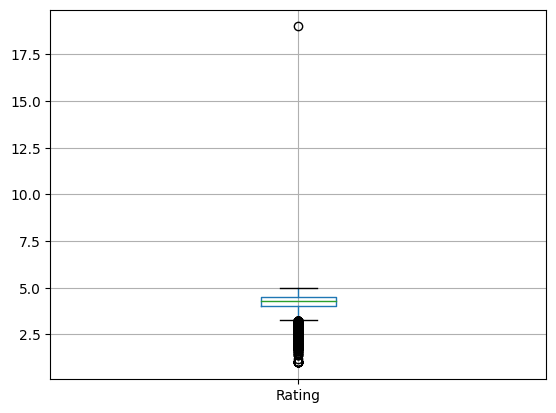

In [7]:
df.boxplot()

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

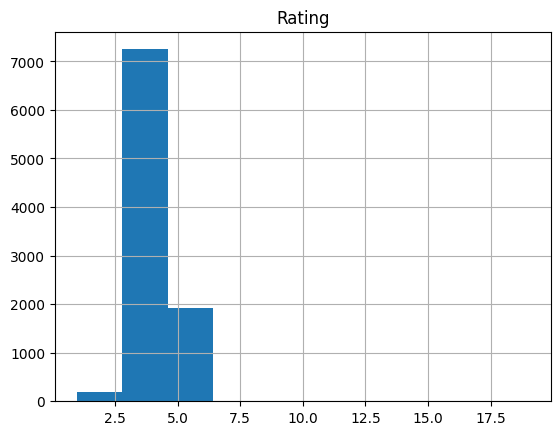

In [8]:
df.hist()

--> There was some outliers in the Rating column, Generally rating was calculate on a scale from 1 to 5 so we will remove those values where rating is greater than 5

## Checking the Rating column where values is grater than 5

In [9]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


--> So we have found only one row where Rating is greater than 5 so it could be treated as outlier, We will remove that row

In [10]:
# Dropping the outliers from Rating Column
df.drop([10472],axis=0,inplace=True)

In [11]:
df[10470:10478]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up
10478,Sci Fi Sounds,FAMILY,3.2,4,8.0M,"1,000+",Free,0,Everyone,Entertainment,"November 2, 2017",1.0,4.0 and up


--> Plotting histogram and box plot to check the distribution after removing outliers Now, the distribution of rating is showing between 1 to 5

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

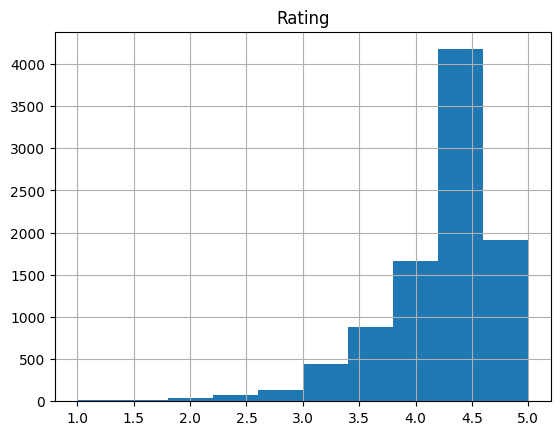

In [12]:
df.hist()

<Axes: >

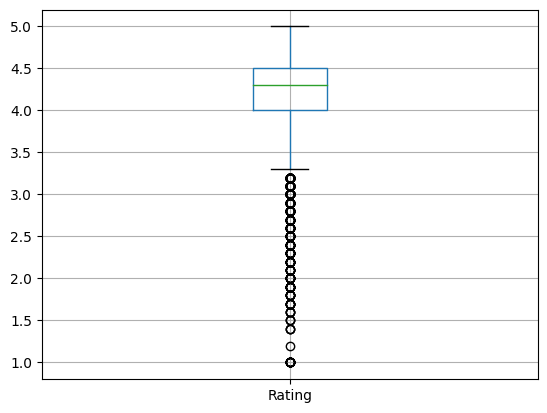

In [13]:
df.boxplot()

In [14]:
# Checking the null values in the Dataset

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

--> We can clearly see above that rating column contains most null values so for replacing them we would take the Median of Rating Column

In [15]:
meanVal = df['Rating'].median() # Taking the median of the Rating

In [16]:
df['Rating'].fillna(value=meanVal, inplace=True) # filling those null values by taking the meadin of Rating

Cheching the null values

In [17]:
# Now we can clearly see that we have sucessfully replaced the null values with median
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

--> Now Type another categorical column contain null value so we will take the mode and replace those null values

In [18]:
# Replacing the null values with Free which is the most frequent value(essentially the mode of the Column)

df["Type"].fillna("Free", inplace = True)


In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### Replacing the $ with ' ' to change datatype from string to float

In [23]:
df['Price' ]=df['Price'].apply(lambda x: str(x).replace('$',' ') if '$' in str(x) else str(x))

### Replacing the + with ' ' to change datatype from string to float

In [24]:
df['Installs' ]=df['Installs'].apply(lambda x: str(x).replace('+',' ') if '+' in str(x) else str(x))

##  Replacing the ',' with ' ' to change the datatype from string to float

In [25]:
df['Installs' ]=df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

### Converting the datatype of Last_update from String to Datetime

In [26]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [27]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

### Converting the datatype from String to Numeric of columns Installs,Reviews and Price

In [28]:
df["Installs"]=pd.to_numeric(df["Installs"])

In [29]:
df["Reviews"]=pd.to_numeric(df["Reviews"])

In [30]:
df["Price"]=pd.to_numeric(df["Price"])

In [31]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


## ***Data Exploration and Visualization***

## Categorical Analysis

##  What is the number of Apps in each category?

In [33]:
# Category vs no of Apps

Category = df.groupby('Category').agg({'App':'count'}).sort_values(['App'],ascending=False)

In [39]:
Category.head(5)

,App
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460


In [34]:
# Creating bar graph from the above data

plt.rcParams['figure.figsize'] = (15,5)

Text(0.5, 0, 'Category')

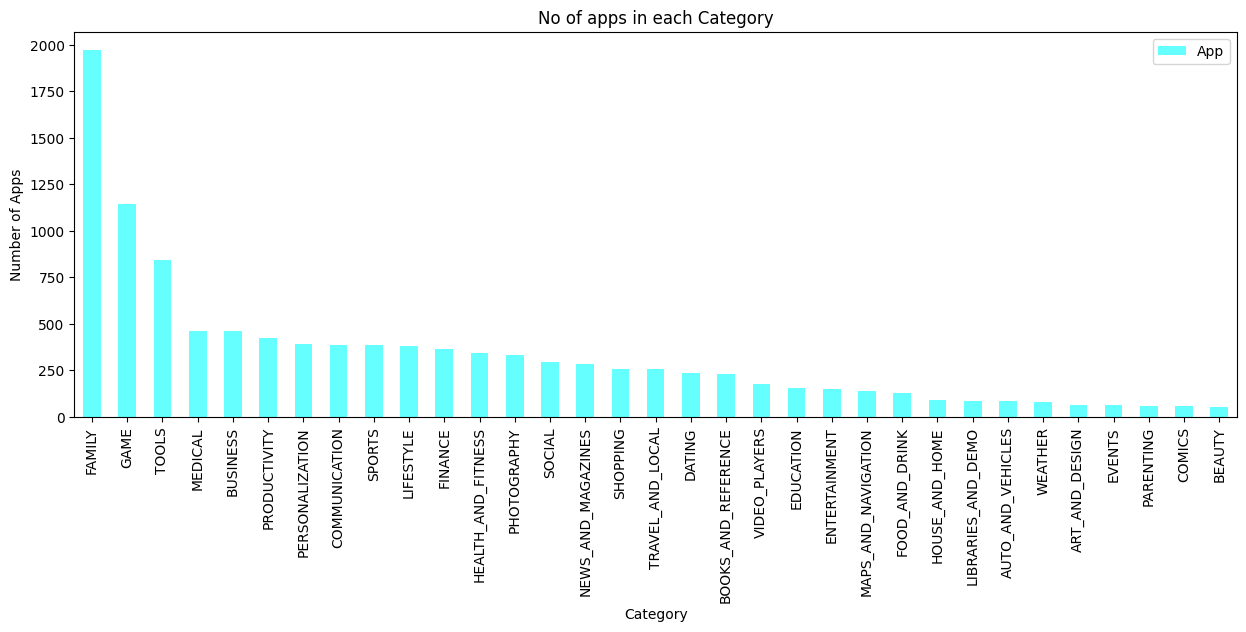

In [38]:
Category.plot(kind='bar',color='cyan',alpha=0.6)

plt.title('No of apps in each Category')
plt.ylabel('Number of Apps')
plt.xlabel('Category')

### --> Family, Game, Tools, Medical and Business are the top 5 categories which contains the most number of Apps.

### --> Family is the category among all which contain the most number of Apps.

##  What is the average user rating Category wise?

In [44]:
# Average user rating Category wise

Mean_Rating= df.groupby('Category').agg({'Rating':'mean'}).sort_values(['Rating'],ascending=False)

## These are the Top 5 categories which has the higest average usr rating

In [41]:
Mean_Rating.head()

,Rating
Category,
EVENTS,4.395313
EDUCATION,4.388462
ART_AND_DESIGN,4.355385
BOOKS_AND_REFERENCE,4.335498
PERSONALIZATION,4.328827


###--> Events, Education, Art_and_Design, Books_and_reference and Personalization are the top 5 categories which has the highest average user Rating.

Text(0.5, 0, 'Category')

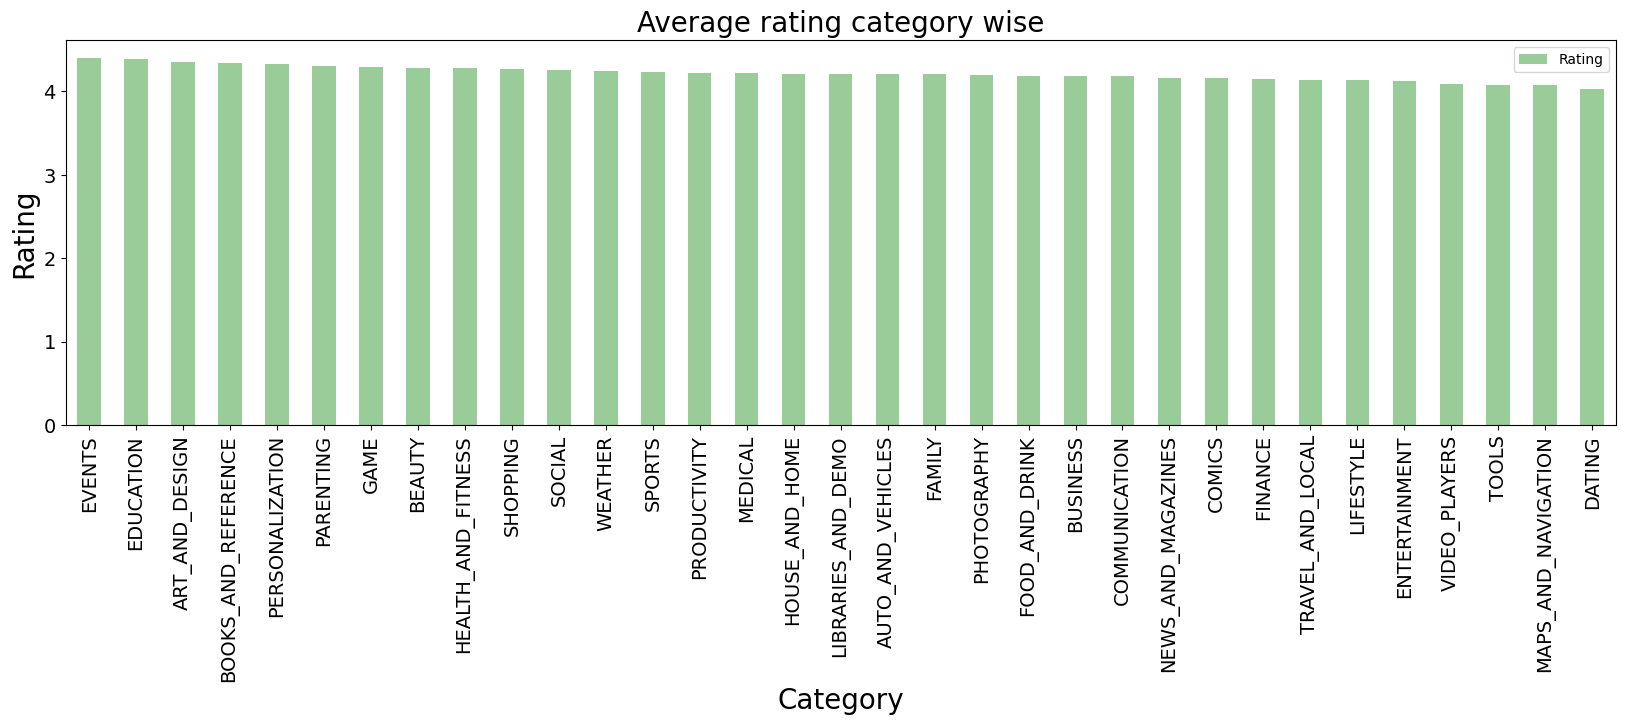

In [43]:
Mean_Rating.plot(kind='bar',figsize = (20,5),fontsize = 14,color='green',alpha=0.4)

plt.title('Average rating category wise',fontsize = 20)
plt.ylabel('Rating', fontsize = 20)
plt.xlabel('Category',fontsize = 20)

### What is the total number of app installation Category wise?

In [45]:
# Category vs total app installs

No_of_Users_Categorical_Wise = df.groupby(['Category']).agg({'Installs':'sum'}).sort_values(['Installs'],ascending=False)

## These are the Top 5 Categories which has the higest number of users Installation

In [48]:
No_of_Users_Categorical_Wise.head()

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915


Text(0.5, 0, 'Category')

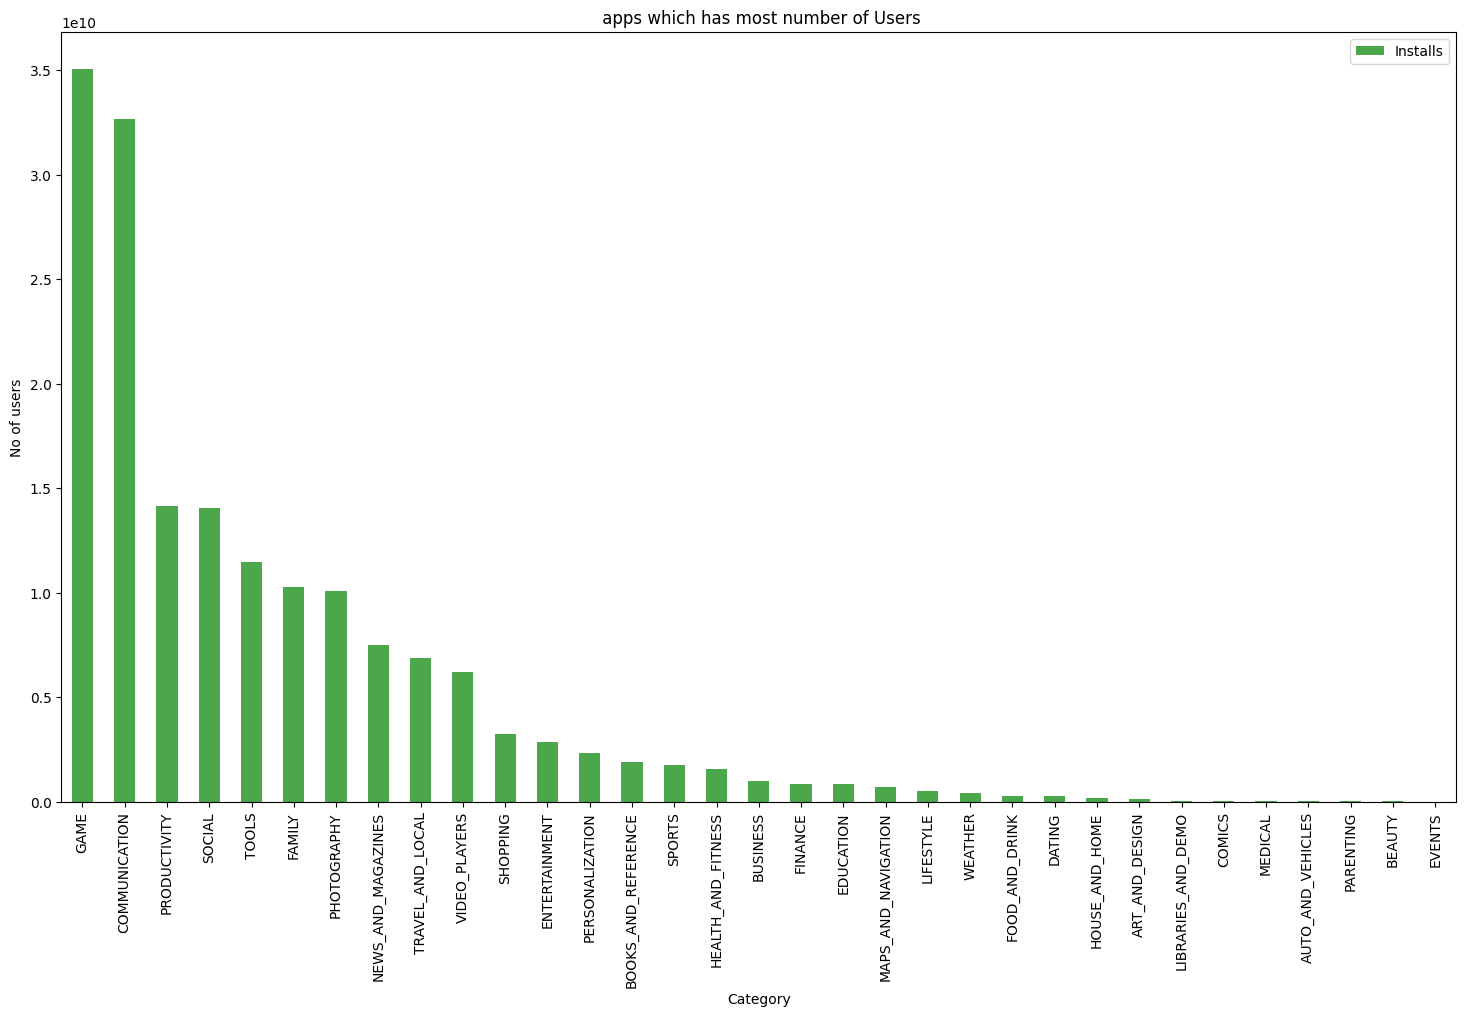

In [47]:
# Plotting a graph
No_of_Users_Categorical_Wise.plot(kind='bar',color=[ 'green'],figsize = (18,10),alpha=0.7)

plt.title(' apps which has most number of Users')
plt.ylabel('No of users')
plt.xlabel('Category')

In [53]:
# App which has the the most number of user installation in the particular category

Top_5_Users_Category_Wise1 = df.groupby(['Category','App']).agg({'Installs':'sum'}).sort_values(['Installs'],ascending=False).head()

In [54]:
Top_5_Users_Category_Wise1

,,Installs
Category,App,
GAME,Subway Surfers,6000000000
PRODUCTIVITY,Google Drive,4000000000
SOCIAL,Instagram,4000000000
PHOTOGRAPHY,Google Photos,4000000000
COMMUNICATION,Hangouts,4000000000


### --> Top 5 categories which has the highest number of app installation are Game, Communication, Productivity,Social and Tools.

### --> Game is top most category among all which has the highest number of user installation.

## Which Category has the higest Average app Installation?

### These are the top 5 categories which has the higest average App Installation

In [55]:
Highest_avg_install = df.groupby(['Category']).agg({'Installs':'mean'}).sort_values(['Installs'],ascending=False).head(5)

In [63]:
Highest_avg_install

,Installs
Category,
COMMUNICATION,8.435989e+07
SOCIAL,4.769447e+07
VIDEO_PLAYERS,3.555430e+07
PRODUCTIVITY,3.343418e+07
GAME,3.066960e+07


## Category with the highest average app installs: Communication

## App Rating analysis

Creating a function user_rating if rating is between 5 and 4 then it is Top Rated, if rating is between 3 and 4 then it is Above Average, if raiting is between 2 and 3 then it is Average and if rating between 1 and 2 it is rated as Below Average.  

In [64]:
def user_rating(Rating):
  if Rating<=5 and Rating>=4:
    x= 'Top Rated'
  elif Rating<4 and Rating>=3:
    x = 'Above Average'
  elif Rating<3 and Rating>=2:
    x = 'Average'
  elif Rating<2 and Rating>=1:
    x = 'Below Average'
  return x

In [65]:
user_rating(2.5)

'Average'

### Creating a new column Rating Type and apply that function we have created above.

In [66]:
df['Rating Type'] = df.apply(lambda x: user_rating(x['Rating']),axis=1)

In [67]:
Rating_Type = df['Rating Type'].value_counts()

In [68]:
Rating_Type

Top Rated        8842
Above Average    1711
Average           231
Below Average      56
Name: Rating Type, dtype: int64

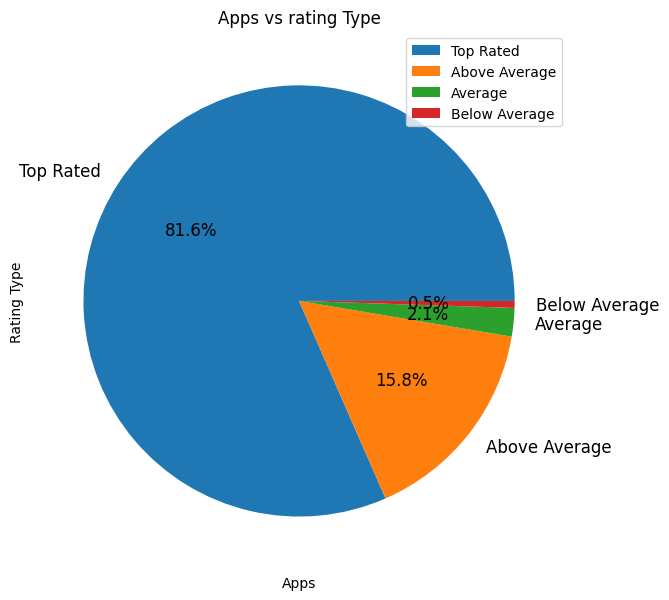

In [72]:
# Creating a pie chart to represent the distribution

Rating_Type.plot.pie(figsize = (15,7),fontsize = 12, autopct='%1.1f%%')

plt.title('Apps vs rating Type')
plt.xlabel('Apps')
plt.ylabel('Rating Type')
plt.legend()

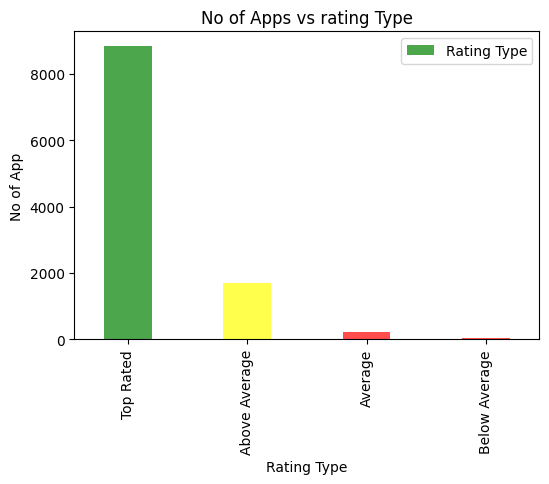

In [88]:
# Creating a bar chart to show the distribution

colors = ['green','yellow','red','red']

Rating_Type.plot(kind='bar',color=colors ,figsize=(6,4),alpha=0.7,width=0.4)

plt.title('No of Apps vs rating Type')
plt.xlabel('Rating Type')
plt.ylabel('No of App')
plt.legend()

##  

--> 81.6% Apps in the dataset are Top Rated.

--> 15.8% Apps in the dataset are Above Average.

--> 2.1% Apps in the dataset are Average.

--> 0.5% Apps in the dataset are Below Average.






## Free vs Paid Apps

In [84]:
# No. of apps which are free and paid

free_vs_Paid_apps = df['Type'].value_counts()

In [85]:
free_vs_Paid_apps

Free    10040
Paid      800
Name: Type, dtype: int64

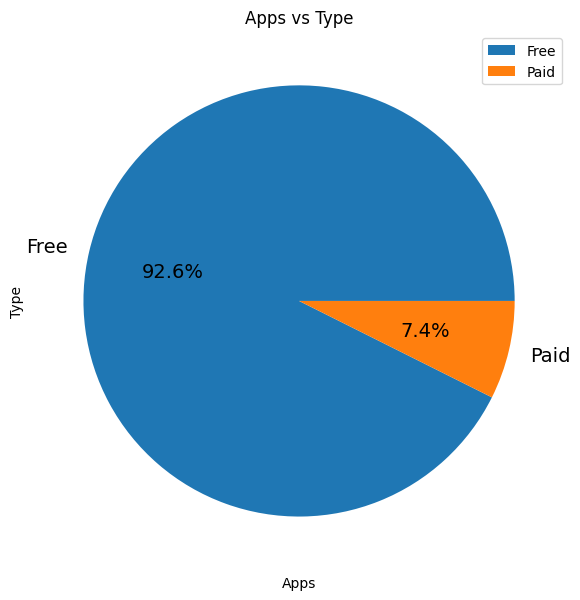

In [87]:
free_vs_Paid_apps.plot.pie(figsize = (15,7),fontsize = 14, autopct='%1.1f%%')

plt.title('Apps vs Type')
plt.xlabel('Apps')
plt.ylabel('Type')
plt.legend()

--> 92.6% Apps are Free which means Users don't need to pay any amount for using them.

--> 7.4% Apps are Paid which means Users have to pay the Price for using them.

--> Users generally prefer the free apps.


## What is the Total number Free and Paid Apps Installation wise?


In [89]:
df.groupby(['Type']).agg({'Installs':'sum'}).sort_values(['Installs'],ascending=False)

,Installs
Type,
Free,167560477406
Paid,72956081


### --> Free Apps has more user Installation than the paid apps.It means Free apps are more Preferable than the Paid apps.

## What is the number of Free and Paid Apps Category wise?

In [ ]:
Total_Installations = df.groupby(['Category','Type']).agg({'App':'count'}).sort_values(['App'],ascending=False).unstack()

In [ ]:
Total_Installations

App       
Type                   Free   Paid
Category                          
ART_AND_DESIGN         62.0    3.0
AUTO_AND_VEHICLES      82.0    3.0
BEAUTY                 53.0    NaN
BOOKS_AND_REFERENCE   203.0   28.0
BUSINESS              446.0   14.0
COMICS                 60.0    NaN
COMMUNICATION         360.0   27.0
DATING                227.0    7.0
EDUCATION             152.0    4.0
ENTERTAINMENT         147.0    2.0
EVENTS                 63.0    1.0
FAMILY               1781.0  191.0
FINANCE               349.0   17.0
FOOD_AND_DRINK        125.0    2.0
GAME                 1061.0   83.0
HEALTH_AND_FITNESS    325.0   16.0
HOUSE_AND_HOME         88.0    NaN
LIBRARIES_AND_DEMO     84.0    1.0
LIFESTYLE             363.0   19.0
MAPS_AND_NAVIGATION   132.0    5.0
MEDICAL               354.0  109.0
NEWS_AND_MAGAZINES    281.0    2.0
PARENTING              58.0    2.0
PERSONALIZATION       309.0   83.0
PHOTOGRAPHY           313.0   22.0
PRODUCTIVITY          396.0   28.0
SHOPPING              258.0    2.0
SOCIAL                292.0    3.0
SPORTS                360.0   24.0
TOOLS                 765.0   78.0
TRAVEL_AND_LOCAL      246.0   12.0
VIDEO_PLAYERS         171.0    4.0
WEATHER                74.0    8.0

Text(0.5, 0, 'Category')

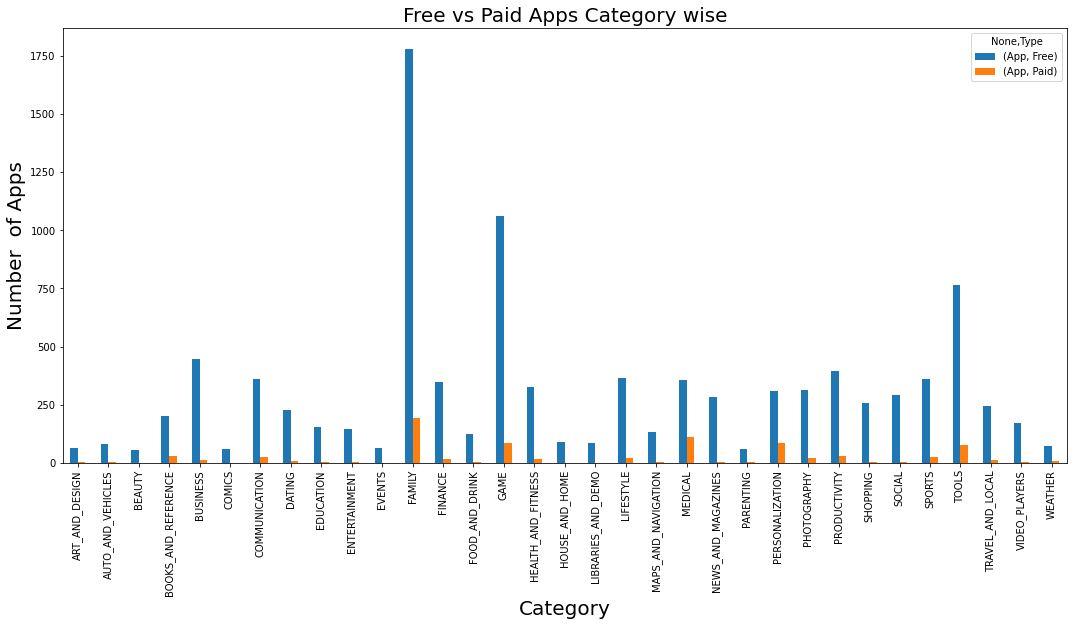

In [ ]:
Total_Installations.plot(kind='bar',figsize=(18,8),fontsize =10)

plt.title('Free vs Paid Apps Category wise',fontsize = 20)
plt.ylabel('Number  of Apps',fontsize = 20)
plt.xlabel('Category',fontsize = 20)

### --> Family,Game,and Tools are the category which contains the highest number of Free and paid apps

## What is the number of free Apps which has more than 1 billion of users.

In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated


### What are the top 5 apps which is free more than 1 billon of user Installation?


In [90]:
# Top 5 apps which has more than 1 billion of Users

df[(df['Type']=='Free')&(df['Installs']>=1000000000)]['App'].reset_index().head()

,index,App
0,152,Google Play Books
1,335,Messenger – Text and Video Chat for Free
2,336,WhatsApp Messenger
3,338,Google Chrome: Fast & Secure
4,340,Gmail


In [ ]:
df[(df['Type']=='Free')&(df['Installs']>=1000000000)]['App'].nunique()


20

###-->There are 20 apps which are free and has more than 1 billion users

## Which app has the most number of installation(users)?

In [92]:
# App which has the the most number of user installation

df.iloc[df['Installs'].idxmax()]

App                 Google Play Books
Category          BOOKS_AND_REFERENCE
Rating                            3.9
Reviews                       1433233
Size               Varies with device
Installs                   1000000000
Type                             Free
Price                             0.0
Content Rating                   Teen
Genres              Books & Reference
Last Updated      2018-08-03 00:00:00
Current Ver        Varies with device
Android Ver        Varies with device
Rating Type             Above Average
Name: 152, dtype: object

## -->Google Play Books has the maximum of Users Installation.

###  Which app has highest and lowest rating and has more than 1 Million of user installation?

In [93]:
x= df[df['Installs']>=1000000]
x.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Type
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up,Top Rated
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,Top Rated
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000,Free,0.0,Everyone,Art & Design,2017-10-27,1.0.4,4.1 and up,Top Rated


In [96]:
# Apps with the maximum rating and installs greater than 1 million

x.groupby('App').agg({'Rating':'max'}).sort_values(['Rating'],ascending=False).head()

,Rating
App,
Tickets + PDA 2018 Exam,4.9
"Learn Japanese, Korean, Chinese Offline & Free",4.9
Six Pack in 30 Days - Abs Workout,4.9
Lose Belly Fat in 30 Days - Flat Stomach,4.9
"ipsy: Makeup, Beauty, and Tips",4.9


In [97]:
# Apps with the minimum rating and installs greater than 1 million.

x.groupby('App').agg({'Rating':'min'}).sort_values(['Rating'],ascending=True).head()

,Rating
App,
AppFinder by AppTap,2.0
Moto Z Market,2.2
CZ File Manager,2.2
PS4 Second Screen,2.4
BT Notifier,2.5


## Which app has the highest rating among all?

In [ ]:
df.iloc[df['Rating'].idxmax()]

App               Hojiboy Tojiboyev Life Hacks
Category                                COMICS
Rating                                     5.0
Reviews                                     15
Size                                       37M
Installs                                  1000
Type                                      Free
Price                                      0.0
Content Rating                        Everyone
Genres                                  Comics
Last Updated               2018-06-26 00:00:00
Current Ver                                2.0
Android Ver                       4.0.3 and up
Rating Type                          Top Rated
Name: 329, dtype: object

### -->Hojiboy Tojiboyev Life Hacks has the higest rated app among all.

### Importing the another dataset users_review

In [98]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User Reviews.csv')

In [99]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Checking the null values in the Dataset

In [100]:
df1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

## Removing the null values from the dataset.

In [101]:
df1 = df1.dropna(axis=0)

In [102]:
df1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

### Rows and Column count in the dataset

In [ ]:
df1.shape

(37427, 5)

## Sentiment Analysis

In [103]:
Sentiments_counts = df1['Sentiment'].value_counts()

In [104]:
Sentiments_counts

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

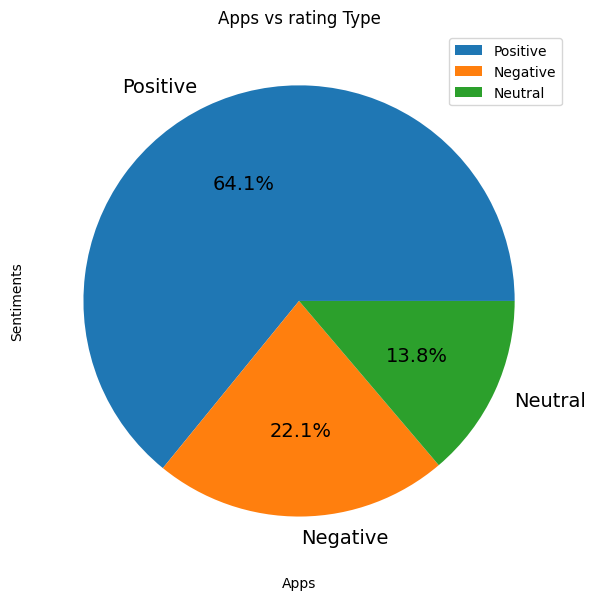

In [105]:
Sentiments_counts.plot.pie(figsize = (15,7),fontsize = 14, autopct='%1.1f%%')

plt.title('Apps vs rating Type')
plt.xlabel('Apps')
plt.ylabel('Sentiments')
plt.legend()

### --> 64.1% of the Apps which has Positive Sentiment.
### --> 22.1% of the Apps which has Negative Sentiment.
### --> 13.8% of the Apps which has Neutral Sentiment.

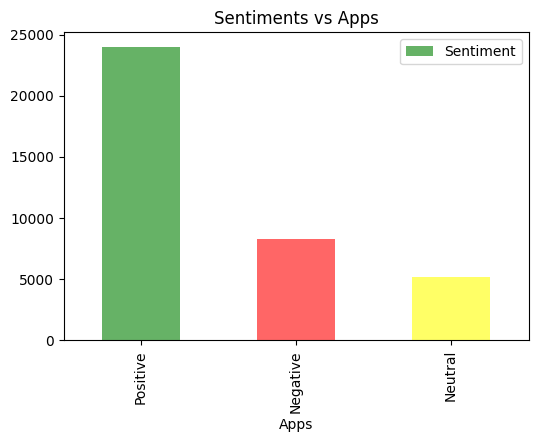

In [113]:
# Creating a bar char to show count of Sentiments

colors = ['green','red','yellow']
Sentiments_counts.plot(kind='bar',figsize=[6,4],color=colors,alpha=0.6,width=0.5)

plt.title('Sentiments vs Apps')
plt.ylabel('')
plt.xlabel('Apps')
plt.legend()

## Which apps has the most number of Positive Sentiment?

In [117]:
# Filter out the data where sentiment is positive

Postive_sentiment = df1[df1['Sentiment']=='Positive']

In [116]:
Postive_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


## These are the top 5 apps which has the most number of Positive Sentiment.

In [118]:
# Apps which has the most number of positive sentiments

Postive_sentiment.groupby('App').agg({'Sentiment':'count'}).sort_values(['Sentiment'],ascending=False).head(5)

,Sentiment
App,
Helix Jump,209
Duolingo: Learn Languages Free,200
Calorie Counter - Macros,174
Calorie Counter - MyFitnessPal,169
Bowmasters,169


## Which apps has the most number of Negative Sentiment?

In [119]:
# Filter out the data where sentiment is Negative

Negative_sentiment = df1[df1['Sentiment']=='Negative']

## These are the top 5 apps which has the most number of Negative Sentiment.

In [121]:
# Apps which has the most number of Negative sentiments

Negative_sentiment.groupby('App').agg({'Sentiment':'count'}).sort_values(['Sentiment'],ascending=False).head(5)

,Sentiment
App,
Angry Birds Classic,147
Candy Crush Saga,126
Bowmasters,119
8 Ball Pool,106
Candy Crush Soda Saga,96


## Content rating vs App users

In [123]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top Rated
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top Rated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top Rated


In [127]:
# No of app based on content rating

Content_rating=df['Content Rating'].value_counts()

In [128]:
Content_rating

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

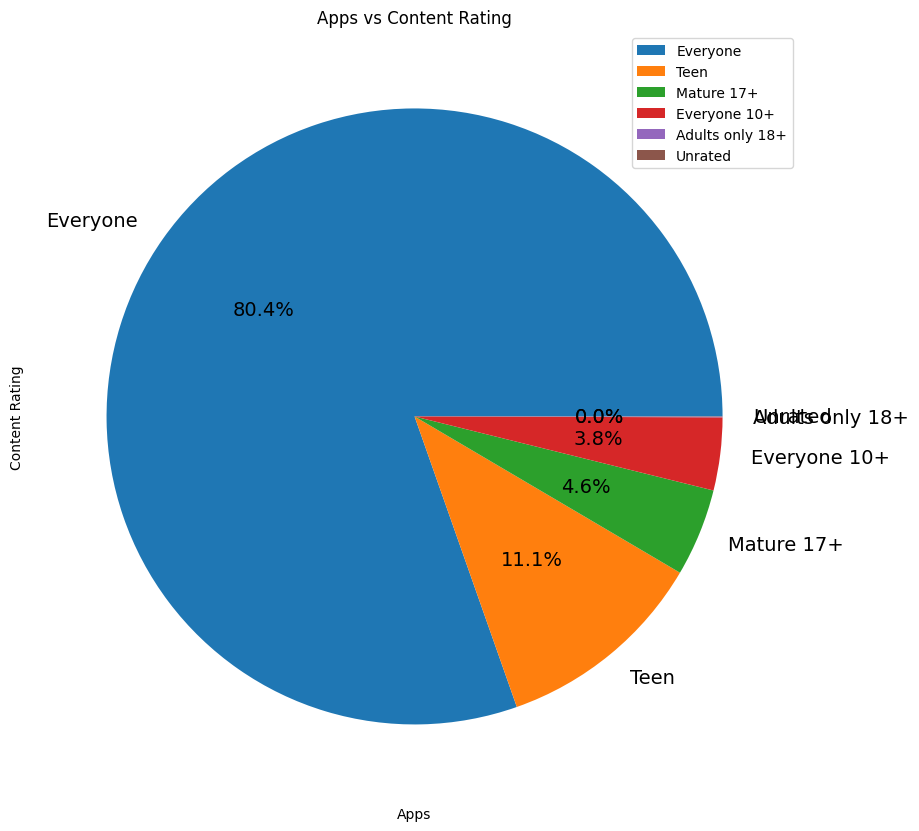

In [129]:
# Creating a pie chart to show the distributon of Content Rating

Content_rating.plot.pie(figsize = (15,10),fontsize = 14, autopct='%1.1f%%')

plt.title('Apps vs Content Rating')
plt.xlabel('Apps')
plt.ylabel('Content Rating')
plt.legend()

### --> 80.4%  apps which has no age restriction and It can be used by everone.
### --> 11.1% apps which has age restriction and used by teenagers.
### --> 4.6 % apps which can only use who are above 17.
### --> 3.8% apps which can only use who are above  10.

## Creating a new Column Revenue based on Installs and Price to derive insights



In [130]:
df['Revenue']=df['Installs']*df['Price']

## Which apps genrated the Maximum Revenue?
Note-> We are taking into consideration for only those for which we have to pay the price for using them.

### These are the top 5 apps among all which genreated the Maximum Revenue

In [131]:
Maximum_revenue = df.groupby('App').agg({'Revenue':'max'}).sort_values(['Revenue'],ascending=False).head()

In [132]:
Maximum_revenue

,Revenue
App,
Minecraft,69900000.0
I am rich,39999000.0
I Am Rich Premium,19999500.0
Hitman Sniper,9900000.0
Grand Theft Auto: San Andreas,6990000.0


In [133]:
# App which generated the maximum revenue

df.iloc[df['Revenue'].idxmax()]['App']

'Minecraft'

## --> Minecraft genrated the maximum revenue among all

Text(0.5, 0, 'Apps')

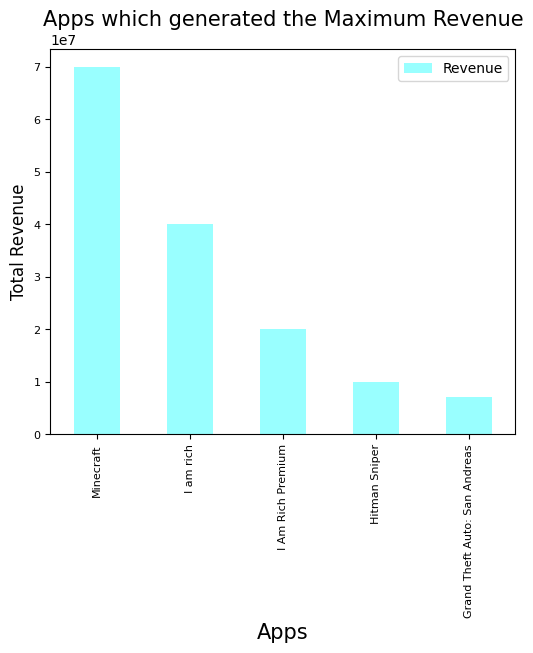

In [139]:
Maximum_revenue.plot(kind='bar',color=['cyan'],figsize = (6,5),fontsize = 8,alpha=0.4,width=0.5)

plt.title('Apps which generated the Maximum Revenue',fontsize = 15)
plt.ylabel('Total Revenue',fontsize =12)
plt.xlabel('Apps',fontsize = 15)

### Which apps are the most popular apps or having maximum number of Reviews?

In [140]:
Most_Popular_apps = df.groupby('App').agg({'Reviews':'max'}).sort_values(['Reviews'],ascending=False).head()

### These are the top 5 apps which is most popular among users and having maximum no of reviews

In [141]:
Most_Popular_apps

,Reviews
App,
Facebook,78158306
WhatsApp Messenger,69119316
Instagram,66577446
Messenger – Text and Video Chat for Free,56646578
Clash of Clans,44893888


In [143]:
df.iloc[df['Reviews'].idxmax()]

App                          Facebook
Category                       SOCIAL
Rating                            4.1
Reviews                      78158306
Size               Varies with device
Installs                   1000000000
Type                             Free
Price                             0.0
Content Rating                   Teen
Genres                         Social
Last Updated      2018-08-03 00:00:00
Current Ver        Varies with device
Android Ver        Varies with device
Rating Type                 Top Rated
Revenue                           0.0
Name: 2544, dtype: object

### --> Facebook is the most popular App among users.

Text(0.5, 0, 'Apps')

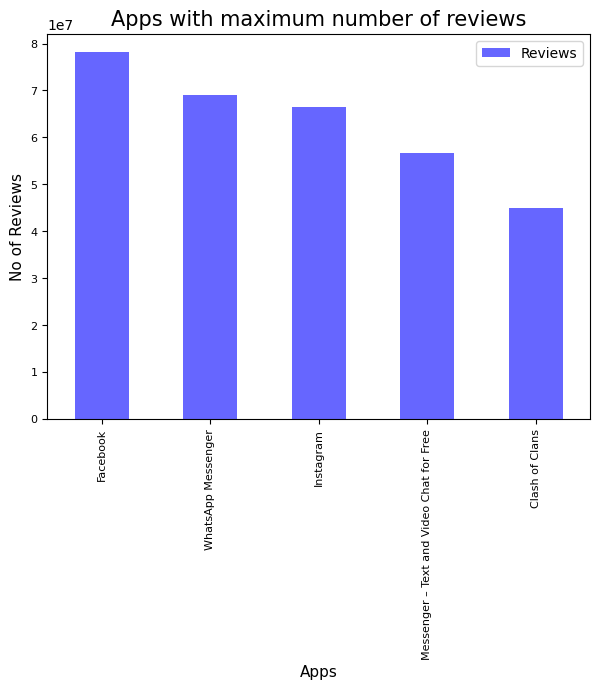

In [150]:
Most_Popular_apps.plot(kind='bar',color=['blue'],figsize = (7,5),fontsize =8,alpha=0.6)

plt.title('Apps with maximum number of reviews',fontsize = 15)
plt.ylabel('No of Reviews',fontsize =11)
plt.xlabel('Apps',fontsize = 11)

## Which Apps has the most number of Users Installation?

### These are the top 10 apps which has the most number of user installation:-

In [151]:
df.groupby('App').agg({'Installs':'max'}).sort_values(['Installs'],ascending=False).head(10)

,Installs
App,
Gmail,1000000000
Google Street View,1000000000
Subway Surfers,1000000000
Facebook,1000000000
Skype - free IM & video calls,1000000000
Google,1000000000
Google Chrome: Fast & Secure,1000000000
Google Drive,1000000000
Google News,1000000000


In [ ]:
df.iloc[df['Installs'].idxmax()]['App']

'Google Play Books'

### --> Google Play Books has the higest number of user Installation.

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price,Revenue
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000,1.084000e+04
mean,4.206476,4.441529e+05,1.546434e+07,1.027368,3.585142e+04
std,0.480342,2.927761e+06,8.502936e+07,15.949703,1.065980e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.800000e+01,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,1.000000e+09,400.000000,6.990000e+07


## Which app is the most expensive app among all?

In [152]:
# App which is most expensive in the Paid Category

df.iloc[df['Price'].idxmax()]['App']

"I'm Rich - Trump Edition"

### --> I'm Rich - Trump Edition is the most expensive app among all

## Which application is mostly used by Teenagers?

In [154]:
# Applications which is mostly used by teenagers

Apps_Teenagers = df[df['Content Rating']=='Teen']

In [155]:
Apps_Teenagers.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Type,Revenue
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top Rated,0.0
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1 and up,Top Rated,0.0
34,I Creative Idea,ART_AND_DESIGN,4.7,353,4.2M,10000,Free,0.0,Teen,Art & Design,2018-04-27,1.6,4.1 and up,Top Rated,0.0
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,10000000,Free,0.0,Teen,Auto & Vehicles,2018-07-11,Varies with device,5.0 and up,Top Rated,0.0
112,Selfie Camera Photo Editor & Filter & Sticker,BEAUTY,4.1,187,30M,50000,Free,0.0,Teen,Beauty,2018-07-24,3.0.1,4.0.3 and up,Top Rated,0.0


--> These are the Top 5 applications which is mostly used by Teenagers and has the maximum number of Installs

In [156]:
Apps_Teenagers.groupby('App').agg({'Installs':'max'}).sort_values(['Installs'],ascending=False).head()

,Installs
App,
Google Play Games,1000000000
Google+,1000000000
YouTube,1000000000
Facebook,1000000000
Google News,1000000000


## Which gaming App is mostly prefferd by the Teenagers?

In [ ]:
# Which gaming app is mostly used by teenagers

In [157]:
# Filtering the data based on gaming category and teenagers

Apps_Teenagerss = df[(df['Content Rating']=='Teen')&(df['Category']=='GAME')]

In [158]:
Apps_Teenagerss .head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Type,Revenue
1671,Kick the Buddy,GAME,4.3,1000417,Varies with device,50000000,Free,0.0,Teen,Action,2018-07-05,Varies with device,4.4 and up,Top Rated,0.0
1679,Granny,GAME,4.5,1135631,59M,50000000,Free,0.0,Teen,Arcade,2018-05-29,1.4.0.1,4.0 and up,Top Rated,0.0
1682,Race the Traffic Moto,GAME,3.8,270687,38M,10000000,Free,0.0,Teen,Racing,2018-07-20,1.0.16,4.0.3 and up,Above Average,0.0
1718,Garena Free Fire,GAME,4.5,5465624,53M,100000000,Free,0.0,Teen,Action,2018-08-03,1.21.0,4.0.3 and up,Top Rated,0.0
1720,Bowmasters,GAME,4.7,1534466,Varies with device,50000000,Free,0.0,Teen,Action,2018-07-23,2.12.5,4.1 and up,Top Rated,0.0


--> These are the top gaming apps which is mostly used or prefferd by Teenagers

In [159]:
Apps_Teenagerss.groupby('App').agg({'Installs':'max'}).sort_values(['Installs'],ascending=False).head()

,Installs
App,
Asphalt 8: Airborne,100000000
Hungry Shark Evolution,100000000
Garena Free Fire,100000000
Bus Rush: Subway Edition,100000000
Mobile Legends: Bang Bang,100000000


##  In Gaming Category Which genere has the most no of users or Installation?

In [160]:
Genre_game = df[df['Category']=='GAME']

### These are the top 5 genre in the gaming Category which has the most number of user Installation

In [161]:
Most_Prefferd_Genres = Genre_game.groupby('Genres').agg({'Installs':'max'}).sort_values(['Installs'],ascending=False).head()

In [162]:
Most_Prefferd_Genres

,Installs
Genres,
Arcade,1000000000
Action,500000000
Casual,500000000
Puzzle,100000000
Adventure,100000000


Text(0.5, 0, 'Apps')

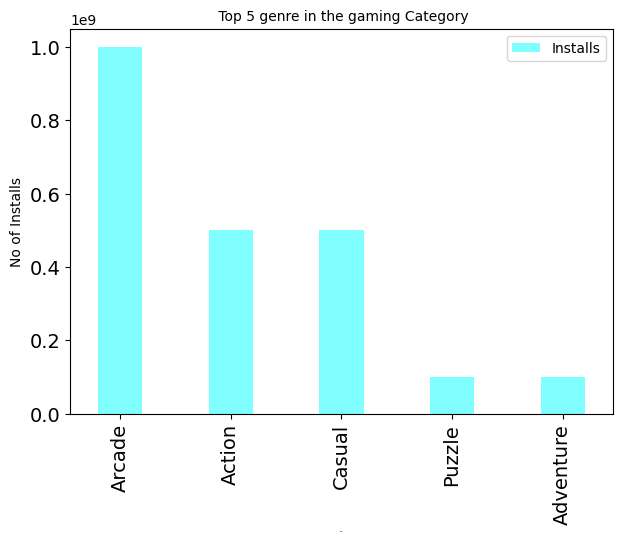

In [167]:
Most_Prefferd_Genres.plot(kind='bar',color=['cyan'],figsize = (7,5),fontsize = 14,alpha=0.5,width=0.4)

plt.title(' Top 5 genre in the gaming Category',fontsize = 10)
plt.ylabel('No of Installs',fontsize = 10)
plt.xlabel('Apps',fontsize = 1)

## Corelation heatmap

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price,Revenue
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000,1.084000e+04
mean,4.206476,4.441529e+05,1.546434e+07,1.027368,3.585142e+04
std,0.480342,2.927761e+06,8.502936e+07,15.949703,1.065980e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.800000e+01,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,1.000000e+09,400.000000,6.990000e+07


Creating a new dataset data_df to find the co-relation between different Columns

In [169]:
data_df = df[['Rating', 'Reviews', 'Installs', 'Price', 'Revenue']]

In [170]:
corr_df = data_df.corr()

In [171]:
corr_df

,Rating,Reviews,Installs,Price,Revenue
Rating,1.000000,0.063166,0.045496,-0.019318,0.009065
Reviews,0.063166,1.000000,0.643122,-0.009667,0.005094
Installs,0.045496,0.643122,1.000000,-0.011689,-0.004503
Price,-0.019318,-0.009667,-0.011689,1.000000,0.194457
Revenue,0.009065,0.005094,-0.004503,0.194457,1.000000


## Plotting a heatmap using library Seaborn

<Axes: >

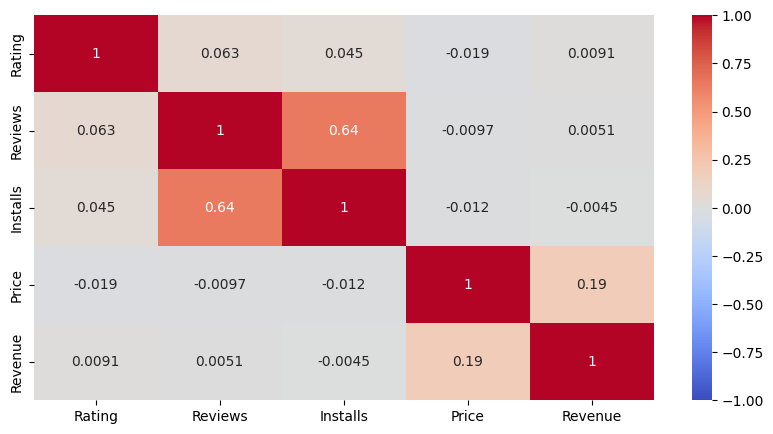

In [172]:
plt.figure(figsize=(10,5))
sns.heatmap(data_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

### There is a Positive Co-relation between Reviews and Installs which means the apps has more number of Reviews or apps which are most popular has higher user installation.

# **Conclusion**

### I started from scratch where the dataset we took was totally raw. I did a lot of cleaning on the data provided to bring it in a cleaner, representable form. Missing values were also removed in this process.

### My motive in whole projct was to analyse the data and find out main components that affects users decision to download app. After completion of analysis. I have found that-:

### 1.  Free Apps has more user Installation as compare to  paid apps.It means Users prefer Free Apps more as compare to Paid Apps.
### 2. Percentage of Free apps are **~92%** and paid apps are **~8%**
### 3.Percentage of apps with no age restrictions = **~82%**
### 4.Most competitive category: **Family**
### 5.Category with the highest number of installs: **Game**
### 6.There are **20** free apps that have been installed over a billion times.
### 7.**Minecraft** is the only app in the paid category with over 10M      installs. This app has also produced the most revenue only from the installation fee.
### 8 .**Hojiboy Tojiboyev Life Hacks** has the higest rated app among all.
### 9. **Google Play Books** has the maximum of Users Installation.
## 10. Apps which is most popular among users and having maximum number of Reviews: **Facebook**
### 11. **I'm Rich - Trump Edition** is the most expensive app among all
## 12. App which contains the maximum number of Positive Reviews : **Helix Jump**
### 13. App which contains the maximum number of Negative Reviews :      **Angry Bird Classic**
### 14.Top 5 apps which is mostly used by Teenagers and has maximum number of Installs: **Google Play Games, Youtube, Facebook, Google+, Google News**.
### 15.In Gaming Category App which is mostly Preffered by Teenagers: **Asphalt 8: Airbone**
### 16.In Gaming Category which Genre has the most number of users or Installation: **Arcade**

### --> 64.1% of the Apps which has Positive Sentiment.
### --> 22.1% of the Apps which has Negative Sentiment.
### --> 13.8% of the Apps which has Neutral Sentiment.






### --> 80.4% apps which has no age restriction and It can be used by everone.
### --> 11.1% apps which has age restriction and used by teenagers.
### --> 4.6 % apps which can only use who are above 17.
### --> 3.8% apps which can only use who are above 10.